In [1]:
import trajectory.main as main
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate

In [2]:
launch_site=main.LaunchSite(0,0,0,0,longi=0.1160127, lat=52.2079404, variable_wind=True,forcast_plus_time="001")

Loading wind data for N52.2079404 E0.1160127 for 001h after forcast run at 00 on 20201213


In [3]:
np.angle(launch_site.wind.get_wind(52.2079404,0.1160127,10000)[0]+launch_site.wind.get_wind(52.2079404,0.1160127,10000)[1]*1j)*180/np.pi

59.62768393114443

In [4]:
alts=np.linspace(0,40000,1000)
wind=[np.linalg.norm(launch_site.wind.get_wind(52.2079404,0.1160127,alt)) for alt in alts]

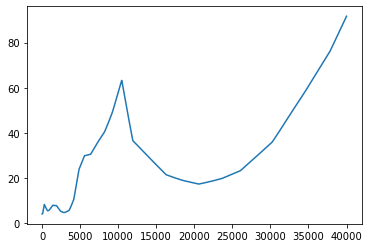

In [5]:
plt.plot(alts,wind)

In [6]:
point_0_0=launch_site.wind.df.query('lat==52').query('long==0')
point_0_1=launch_site.wind.df.query('lat==52').query('long==0.25')
point_1_0=launch_site.wind.df.query('lat==52.25').query('long==0')
point_1_1=launch_site.wind.df.query('lat==52.25').query('long==0.25')

In [7]:
wind_0_0_x=scipy.interpolate.interp1d(point_0_0["alt"],point_0_0["w_x"])(10000)
wind_0_1_x=scipy.interpolate.interp1d(point_0_1["alt"],point_0_1["w_x"])(10000)
wind_1_0_x=scipy.interpolate.interp1d(point_1_0["alt"],point_1_0["w_x"])(10000)
wind_1_1_x=scipy.interpolate.interp1d(point_1_1["alt"],point_1_1["w_x"])(10000)

wind_0_0_y=scipy.interpolate.interp1d(point_0_0["alt"],point_0_0["w_y"])(10000)
wind_0_1_y=scipy.interpolate.interp1d(point_0_1["alt"],point_0_1["w_y"])(10000)
wind_1_0_y=scipy.interpolate.interp1d(point_1_0["alt"],point_1_0["w_y"])(10000)
wind_1_1_y=scipy.interpolate.interp1d(point_1_1["alt"],point_1_1["w_y"])(10000)

wind_0_x=scipy.interpolate.interp1d([0,0.25],[wind_0_0_x,wind_0_1_x])(0.1160127)
wind_1_x=scipy.interpolate.interp1d([0,0.25],[wind_1_0_x,wind_1_1_x])(0.1160127)

wind_0_y=scipy.interpolate.interp1d([0,0.25],[wind_0_0_y,wind_0_1_y])(0.1160127)
wind_1_y=scipy.interpolate.interp1d([0,0.25],[wind_1_0_y,wind_1_1_y])(0.1160127)

wind_x=scipy.interpolate.interp1d([52,52.25],[wind_0_x,wind_1_x])(52.2079404)
wind_y=scipy.interpolate.interp1d([52,52.25],[wind_0_y,wind_1_y])(52.2079404)

In [8]:
print(wind_x,wind_y)

50.03460274919859 -29.3226392588536
